## Tinotenda-Plant-Disease-Detection-Model

In [78]:
# import libraries]
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
import seaborn as sns
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize, LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from itertools import product
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
from keras.utils.vis_utils import plot_model
import tensorflow_hub as hub

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Check images in datasets. There are 5 datasets, hence 5 classes are used
def plot_images(path):
  plt.figure(figsize=(12,12))
  for i in range(1, 17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    random_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(random_img)
    plt.xlabel(random_img.shape[1], fontsize=10)
    plt.ylabel(random_img.shape[0], fontsize=10)

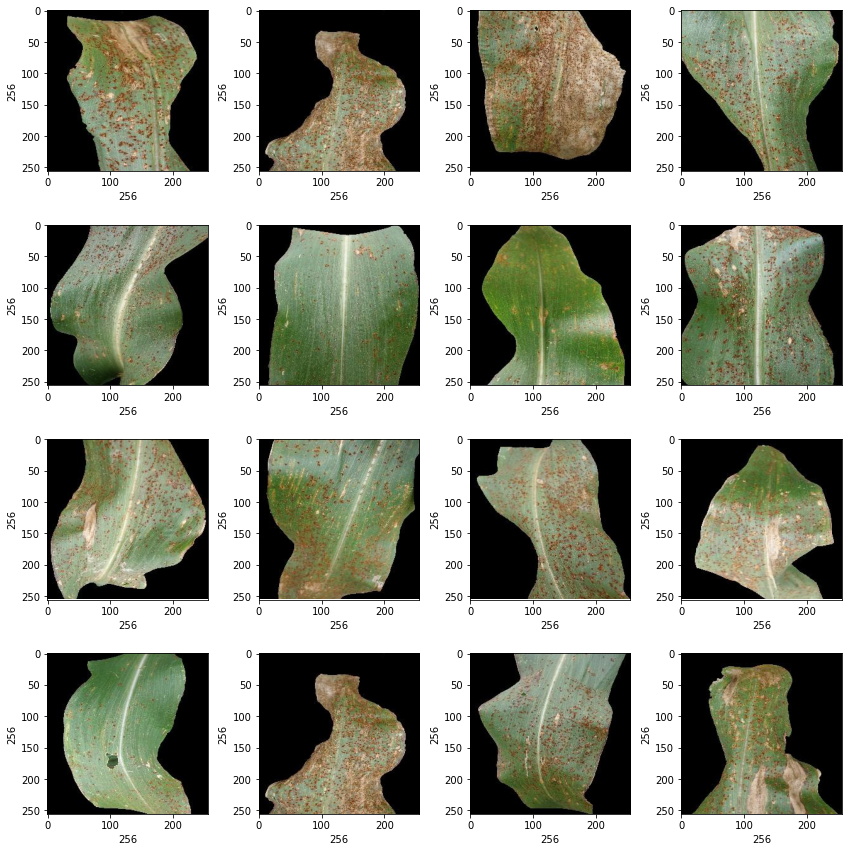

In [4]:
# Common Corn Rust In Maize
plot_images("drive/MyDrive/Plant_Tino/Plant_Diseases/Corn_(maize)___Common_rust_")

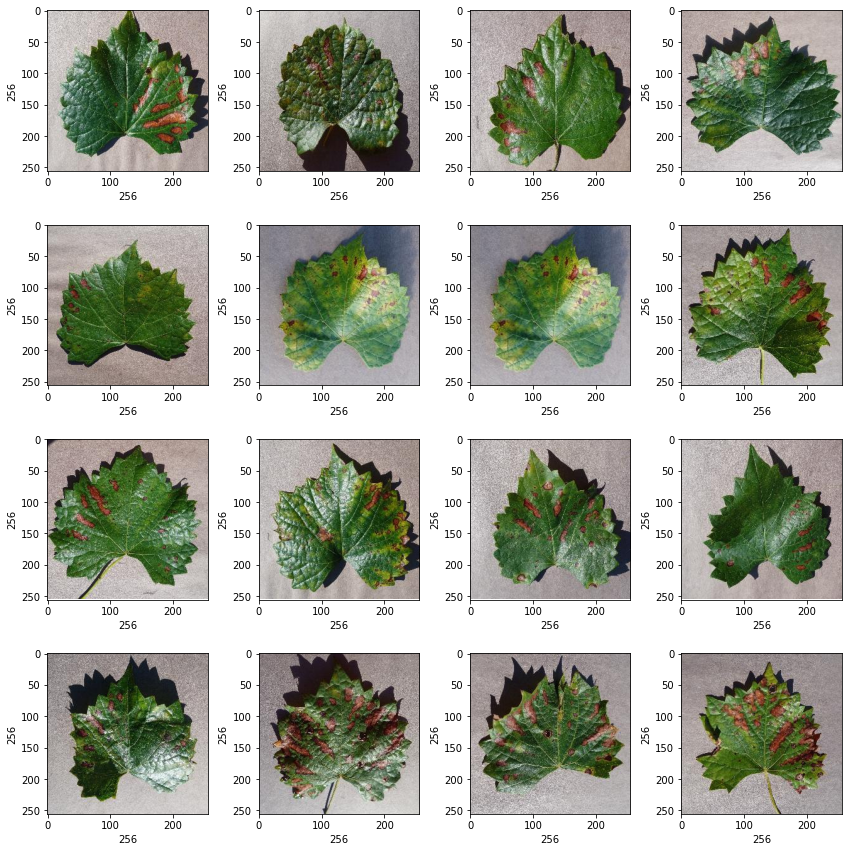

In [5]:
# Black Measles in Grapes
plot_images("drive/MyDrive/Plant_Tino/Plant_Diseases/Grape___Esca_(Black_Measles)")

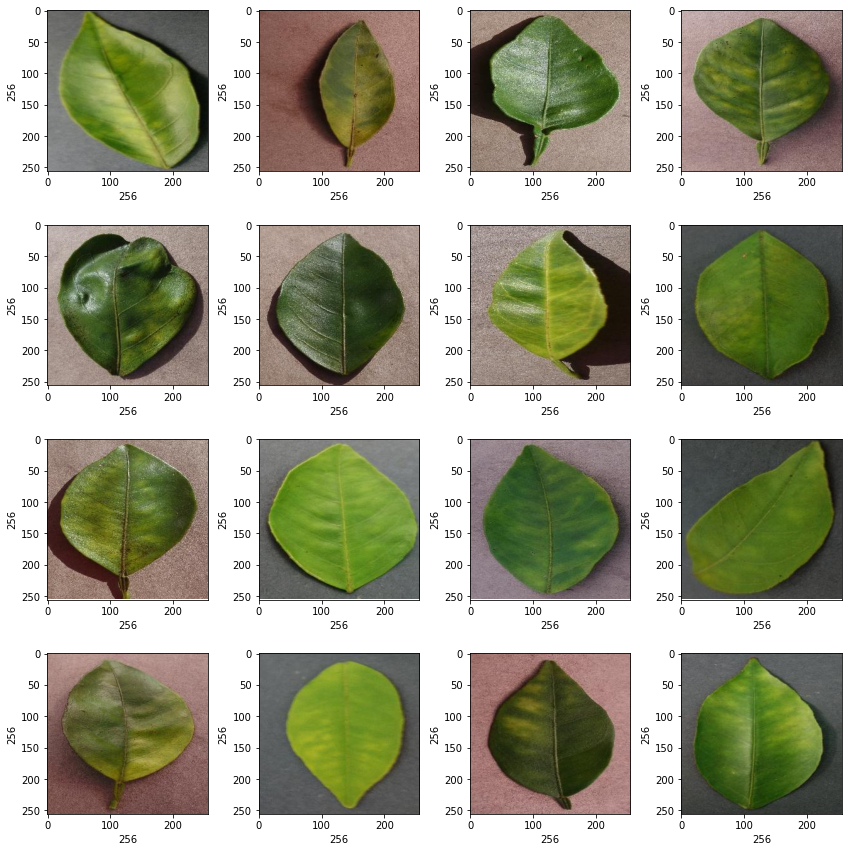

In [6]:
# Citrus Greening in Oranges
plot_images("drive/MyDrive/Plant_Tino/Plant_Diseases/Orange___Haunglongbing_(Citrus_greening)")

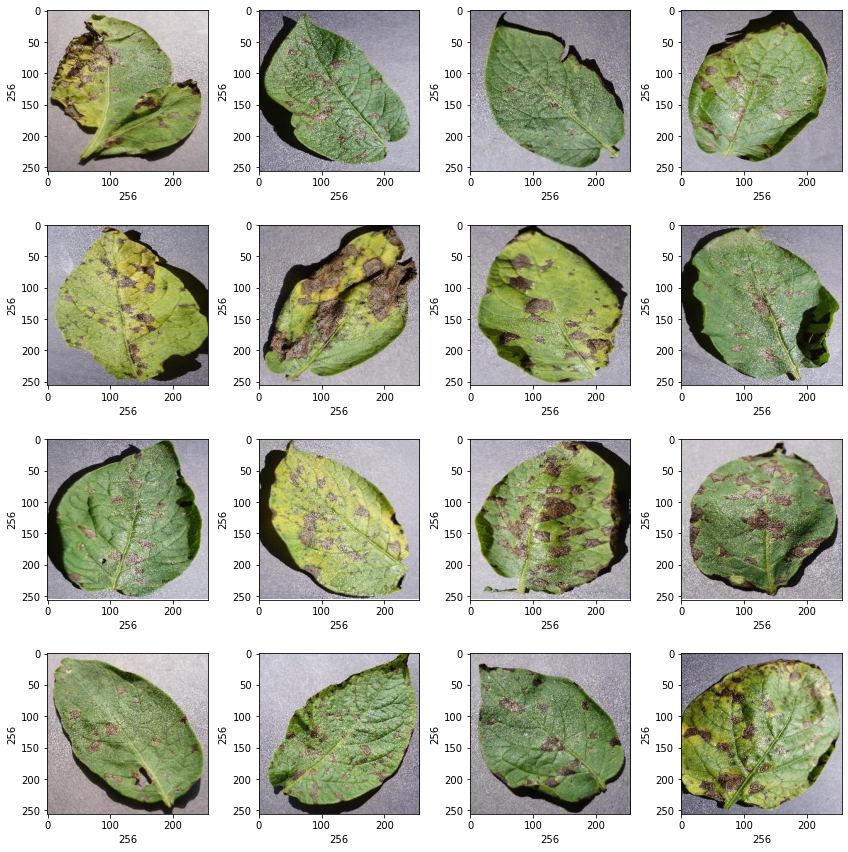

In [7]:
# Early blight in Potatoes
plot_images("drive/MyDrive/Plant_Tino/Plant_Diseases/Potato___Early_blight")

In [8]:
# Convert images into numpy array inorder to enable normalization
def convert_image_to_array(image_dir):
  try:
    image = cv2.imread(image_dir)
    if image is not None:
      image = cv2.resize(image, (256,256))
      return img_to_array(image)
    else:
      return np.array([])
  except Exception as e:
    print(f"Error : {e}")
    return None

In [9]:
dir = '/content/drive/MyDrive/Plant_Tino/Plant_Diseases'
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Common_Corn_Rust', 'Black_Measles_Grapes', 'Citrus_Greening_Oranges', 'Early_Blight_Potatoes', 'Bacterial_Spots_Tomatoes']
binary_labels = [0, 1, 2, 3, 4]
temp = -1

# Convert to numpy array
for directory in root_dir:
  if '.DS_Store' in directory:
    continue
  else: 
    plant_diseases = listdir(f"{dir}/{directory}")
    temp += 1
    for files in plant_diseases:
      image_path = f"{dir}/{directory}/{files}"
      image_list.append(convert_image_to_array(image_path))
      label_list.append(binary_labels[temp])

In [10]:
print(label_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [11]:
len(label_list)

8634

In [12]:
# Create dictionary with labels as keys and the names of the plant diseases as values
plant_dict = {}
for i in range(len(label_list)):
  if label_list[i] == 0:
    plant_dict[i] = "Common_Corn_Rust"
  elif label_list[i] == 1:
    plant_dict[i] = "Black_Measles_Grapes"
  elif label_list[i] == 2:
    plant_dict[i] = "Citrus_Greening_Oranges"
  elif label_list[i] == 3:
    plant_dict[i] = "Early_Blight_Potatoes"
  else:
    plant_dict[i] = "Bacterial_Spots_Tomatoes"

In [13]:
# Create dataframe of Labels and Plant Diseases
labels_dataframe = pd.DataFrame({"Labels_id": plant_dict.keys(), "Plant_Disease": plant_dict.values()})

In [14]:
labels_dataframe["Plant_Disease"].value_counts()

Black_Measles_Grapes        5507
Bacterial_Spots_Tomatoes    2227
Citrus_Greening_Oranges      300
Common_Corn_Rust             300
Early_Blight_Potatoes        300
Name: Plant_Disease, dtype: int64

In [15]:
labels_dataframe

Labels_id             Plant_Disease
0             0          Common_Corn_Rust
1             1          Common_Corn_Rust
2             2          Common_Corn_Rust
3             3          Common_Corn_Rust
4             4          Common_Corn_Rust
...         ...                       ...
8629       8629  Bacterial_Spots_Tomatoes
8630       8630  Bacterial_Spots_Tomatoes
8631       8631  Bacterial_Spots_Tomatoes
8632       8632  Bacterial_Spots_Tomatoes
8633       8633  Bacterial_Spots_Tomatoes

[8634 rows x 2 columns]

In [16]:
# Function to display actual values on top of bar graphs/count plots

def display_numbers(graph):
  i=0
  for p in graph.patches:
      height = p.get_height()
      graph.text(p.get_x()+p.get_width()/2., height + 0.1,
          height,ha="center")
      i += 1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


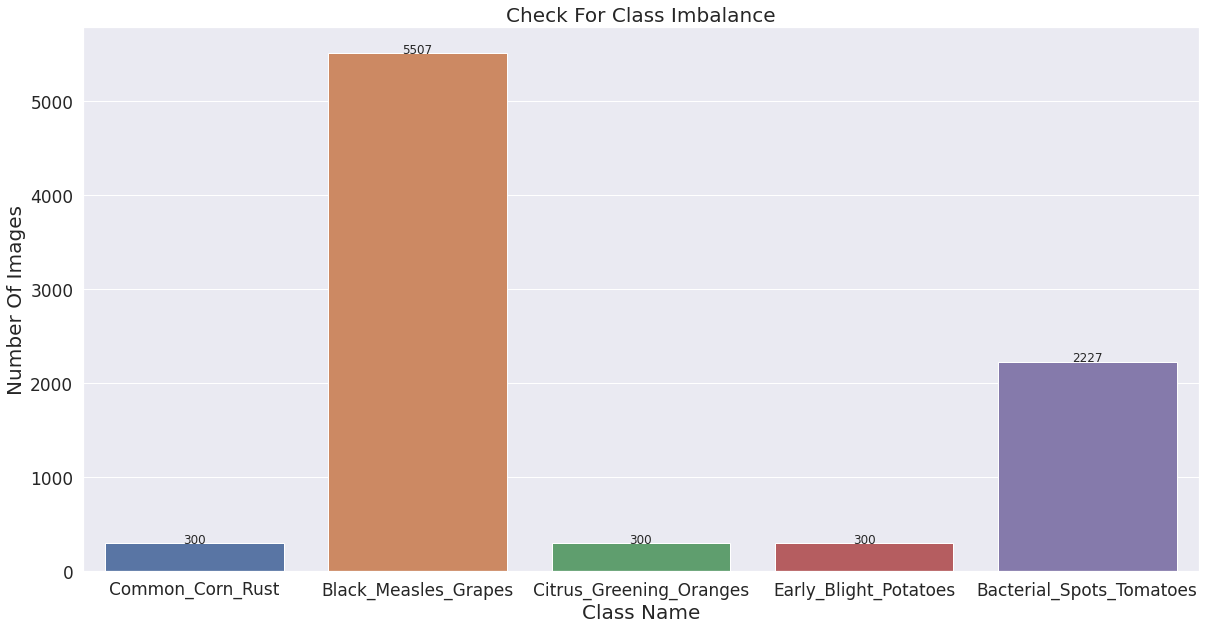

In [17]:
# Check for any class imbalance
plt.figure(figsize=(20,10))
sns.set(style='darkgrid')
ax = sns.countplot(labels_dataframe['Plant_Disease'])
plt.title('Check For Class Imbalance', fontsize=20)
plt.xlabel('Class Name', fontsize=20)
plt.ylabel('Number Of Images', fontsize=20)
plt.xticks(size=17)
plt.yticks(size=17) 
display_numbers(ax)
plt.show()

In [18]:
# Check image shape
image_list[0].shape

(256, 256, 3)

In [19]:
# Check total number of images in label list
label_list = np.array(label_list)
label_list.shape

(8634,)

In [20]:
# Split the dataset into 80% training set and 20% test set
X_train, X_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state=0)

In [21]:
# Next, we Normalize the dataset
X_train = np.array(X_train, dtype=np.float16) / 225.0
X_test = np.array(X_test, dtype=np.float16) / 225.0
X_train = X_train.reshape(-1, 256, 256, 3)
X_test = X_test.reshape(-1, 256, 256, 3)

In [22]:
# Performing One-Hot-Encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [23]:
# Build the model
model = Sequential() # Build the model layer by layer (Simplest in Keras)


# Conv2D layer is the layer that will deal with our input images which are seen as 2D matrices
# The number of nodes ion the layer is 32
# We will have a 3x3 filter matrix
# Padding = same preserves the spatial dimensions of the volume such that the output volume size matches the input volume size
# The input images are of size 256x256 and 3 indicates that the images are color-scale
# The activation function that we will use is Rectified Linear Activation
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256, 256, 3), activation="relu"))

# Max pooling is used to reduce the spatial dimensions of the output volume. 3x3 is the Window size over which to take the maximum. 
# (3 x 3) will take the max value over a (3 x 3) pooling window
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten is a connection between the convolution and the dense layers.
model.add(Flatten())

# Dense is the layer type that will be used for the output layer
# 64 nodes will be in our output layer
model.add(Dense(64, activation="relu"))

# 3 nodes will be used since we have 3 classes
# Softmax makes the output sum up to 1 so the output can be interpreted as probabilities
# The model will then make its prediction based on which option has the highest probability
model.add(Dense(5, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 42, 42, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 112896)            0         
                                                                 
 dense (Dense)               (None, 64)                7

In [24]:
# Time to compile the model
# loss function will be categorical_crossentropy since we are working with categorical data. Lower score will indicate that the model is performing better
# Optimizer controls the learning rate, and we will be using adam
# The alpha value(0.0001) is the proportion that weights are updated. Larger values result in faster initial learning before the rate is updated. 
# Accuracy is used as the metric to see the accuracy score on the validation set when we train the model
model.compile(loss="categorical_crossentropy", optimizer=Adam(0.0001), metrics=["accuracy"])

In [25]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [26]:
# Fit the model
epochs = 30
batch_size = 32
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/30
173/173 [==============================] - 183s 1s/step - loss: 0.2750 - accuracy: 0.9193 - val_loss: 0.0882 - val_accuracy: 0.9761
Epoch 2/30
173/173 [==============================] - 181s 1s/step - loss: 0.0657 - accuracy: 0.9801 - val_loss: 0.0589 - val_accuracy: 0.9797
Epoch 3/30
173/173 [==============================] - 184s 1s/step - loss: 0.0396 - accuracy: 0.9881 - val_loss: 0.0450 - val_accuracy: 0.9848
Epoch 4/30
173/173 [==============================] - 183s 1s/step - loss: 0.0245 - accuracy: 0.9928 - val_loss: 0.0374 - val_accuracy: 0.9855
Epoch 5/30
173/173 [==============================] - 184s 1s/step - loss: 0.0170 - accuracy: 0.9953 - val_loss: 0.0310 - val_accuracy: 0.9899
Epoch 6/30
173/173 [==============================] - 184s 1s/step - loss: 0.0107 - accuracy: 0.9975 - val_loss: 0.0379 - val_accuracy: 0.9891
Epoch 7/30
173/173 [==============================] - 185s 1s/step - loss: 0.0080 - accuracy: 0.9984 - val_loss: 0.0275 - val_accuracy: 0.9920

In [27]:
# Save the model
model.save("/content/drive/MyDrive/Plant_Tino/Plant_Tino.h5")

# Serialize it to json
json_model = model.to_json()

# Save model architecture to JSON file
with open('/content/drive/MyDrive/Plant_Tino/Plant_Tino.json', 'w') as json_file:
  json_file.write(json_model)

# Save weights of the model
model.save_weights('/content/drive/MyDrive/Plant_Tino/Plant_Tino_Weights.h5')

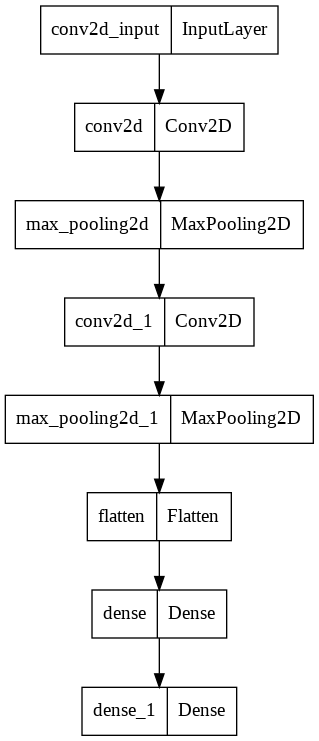

In [81]:
# Visualize the structure of the model
tf.keras.utils.plot_model(
model, to_file='/content/drive/MyDrive/Plant_Tinomodel.png', show_shapes=False, show_dtype=False,
show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

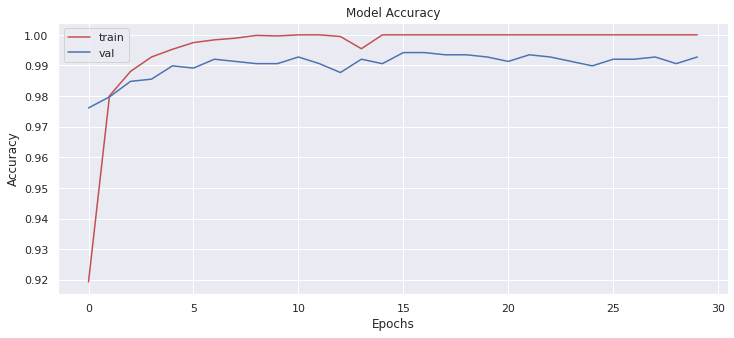

In [28]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [29]:
print("Model Accuracy is: ")
scores = model.evaluate(X_test, y_test)
print(scores[1]*100)

Model Accuracy is: 
54/54 [==============================] - 14s 267ms/step - loss: 0.0188 - accuracy: 0.9942
99.42095875740051


In [65]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), target_names=["Common_Corn_Rust", "Black_Measles_Grapes", "Citrus_Greening_Oranges", "Early_Blight_Potatoes", "Bacterial_Spots_Tomatoes"]))

                          precision    recall  f1-score   support

        Common_Corn_Rust       0.99      0.97      0.98        71
    Black_Measles_Grapes       1.00      1.00      1.00      1090
 Citrus_Greening_Oranges       0.92      0.93      0.93        61
   Early_Blight_Potatoes       1.00      1.00      1.00        62
Bacterial_Spots_Tomatoes       1.00      1.00      1.00       443

                accuracy                           0.99      1727
               macro avg       0.98      0.98      0.98      1727
            weighted avg       0.99      0.99      0.99      1727



### The accuracy is 99%.
### The Average precision, recall and f1-score are all 98%.
### The Weighted Average precision, recall and f1-score are all 99%.

In [32]:
# Print the confusion matrix
y_pred = model.predict(X_test)
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

In [55]:
# Function to plot confusion matrix

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=17)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size=17)
    plt.yticks(tick_marks, classes, size=17)

    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label', size=17)
    plt.xlabel('Predicted label', size=17)


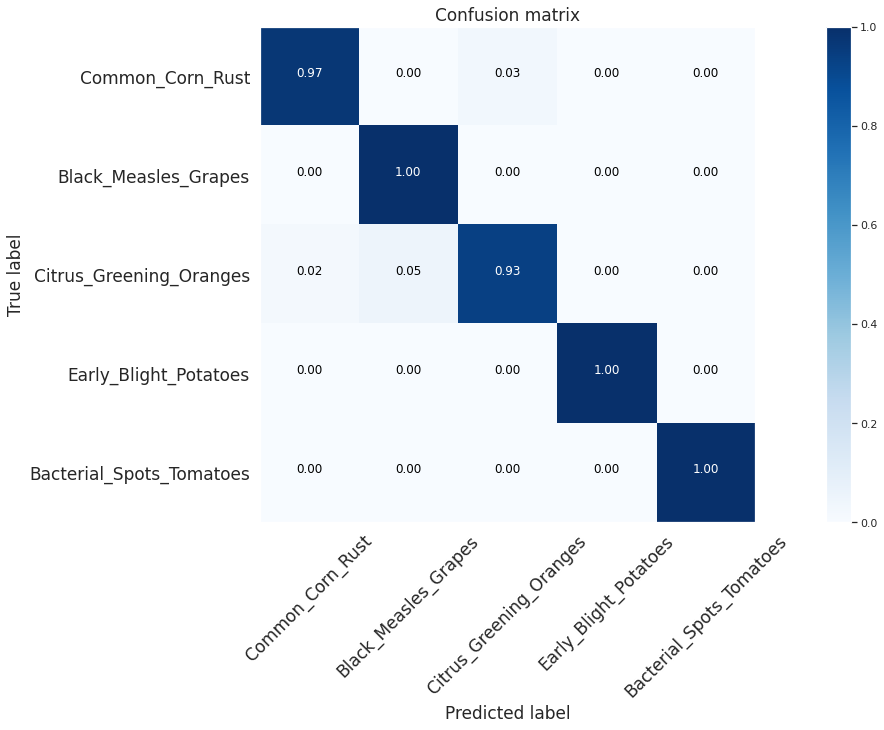

In [57]:
# Plot the confusion matrix
plt.figure(figsize=(20,10))
plt.grid(False)
plot_confusion_matrix(matrix, classes=["Common_Corn_Rust", "Black_Measles_Grapes", "Citrus_Greening_Oranges", "Early_Blight_Potatoes", "Bacterial_Spots_Tomatoes"])
plt.show()